In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train'):
    for filename in filenames[:5]:  #dont want to list all
        print(os.path.join(dirname, filename))

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/a171e61840.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/4171ea3a0c.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/0f985a8440.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/5d320ade20.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/ae8c67086b.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/notype/1e8d55d48d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/notype/89e9ed3

In [2]:
##load 3 files
import pandas as pd
import os

TDCF_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"

# list files
tdcs_files = [f for f in os.listdir(TDCF_PATH) if f.endswith(".csv")]

# load files
sample_file1 = os.path.join(TDCF_PATH, tdcs_files[5])
df1 = pd.read_csv(sample_file1)
#print(df1.head(5))

sample_file2 = os.path.join(TDCF_PATH, tdcs_files[15])
df2 = pd.read_csv(sample_file2)
#print(df2.head(5))

sample_file3 = os.path.join(TDCF_PATH, tdcs_files[25])
df3 = pd.read_csv(sample_file3)
#print(df3.head(5))

In [3]:
def dataset_overview(df, name):
    print(f"===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nHead:\n", df.head(3))
    print("\n-------------------\n")

dataset_overview(df1, "Dataset 1")
dataset_overview(df2, "Dataset 2")
dataset_overview(df3, "Dataset 3")

===== Dataset 1 =====
Shape: (8183, 7)
Columns: ['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking']

Missing values:
 Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

Head:
    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.344086 -0.225303 -2.431794                0     0        0
1     1 -9.334921 -0.234452 -2.425015                0     0        0
2     2 -9.340987 -0.226840 -2.429140                0     0        0

-------------------

===== Dataset 2 =====
Shape: (9938, 7)
Columns: ['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking']

Missing values:
 Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

Head:
    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -8.955

Here we check the shape, column names, and missing values in each dataset. This helps us understand the structure of the files, confirm that the expected signals and event labels are present before further analysis.

In [4]:
def signal_stats(df, name):
    sig_cols = [c for c in ['AccV','AccML','AccAP'] if c in df.columns]
    print(f"===== Signal Stats: {name} =====")
    print(df[sig_cols].describe())
    print("\n")

signal_stats(df1, "Dataset 1")
signal_stats(df2, "Dataset 2")
signal_stats(df3, "Dataset 3")

===== Signal Stats: Dataset 1 =====
              AccV        AccML        AccAP
count  8183.000000  8183.000000  8183.000000
mean     -9.466285    -0.328058     1.042473
std       0.589109     0.853004     1.764637
min     -13.363583    -5.147919    -3.103076
25%      -9.714356    -0.654836     0.645688
50%      -9.425090    -0.262503     1.581939
75%      -9.181331     0.123590     2.100066
max      -5.764722     2.728107     5.322573


===== Signal Stats: Dataset 2 =====
              AccV        AccML        AccAP
count  9938.000000  9938.000000  9938.000000
mean     -9.534513    -0.070438    -0.505302
std       0.820164     0.680315     1.487464
min     -14.193930    -2.589787    -6.515947
25%      -9.844360    -0.445212    -0.764294
50%      -9.545002    -0.016173    -0.139410
75%      -8.918930     0.250765     0.279927
max      -6.554793     2.761193     5.693978


===== Signal Stats: Dataset 3 =====
              AccV        AccML        AccAP
count  9857.000000  9857.000000  

We look at the basic statistics (mean, min, max, standard deviation) for the accelerometer signals. This tells us the range of motion captured and whether the values are consistent across the datasets. For example, higher standard deviation usually means more intense or irregular movement.

In [5]:
def event_summary(df, name):
    events = [c for c in ['Turn','Walking','StartHesitation'] if c in df.columns]
    counts = {ev: df[ev].sum() for ev in events}
    print(f"===== Event Summary: {name} =====")
    print(counts, "\n")

event_summary(df1, "Dataset 1")
event_summary(df2, "Dataset 2")
event_summary(df3, "Dataset 3")


===== Event Summary: Dataset 1 =====
{'Turn': 312, 'Walking': 0, 'StartHesitation': 0} 

===== Event Summary: Dataset 2 =====
{'Turn': 3599, 'Walking': 553, 'StartHesitation': 98} 

===== Event Summary: Dataset 3 =====
{'Turn': 182, 'Walking': 0, 'StartHesitation': 0} 



This summary counts how many times each type of event occurs (Turn, Walking, Start Hesitation). It helps us see what kind of movements dominate each dataset and ensures that all event labels are being captured.

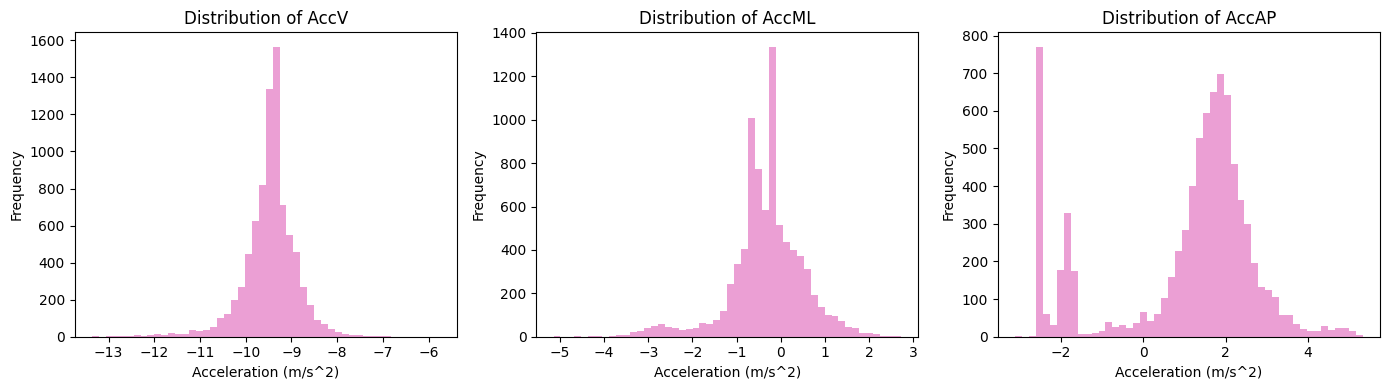

In [6]:
import matplotlib.pyplot as plt
# histograms of each accelerometer axis to see distribution of sensor readings over all samples
plt.figure(figsize=(14,4))

for i, col in enumerate(["AccV", "AccML", "AccAP"], 1):
    plt.subplot(1, 3, i)
    plt.hist(df1[col], bins=50, alpha=0.7, color='tab:pink')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Acceleration (m/s^2)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


This visualization helps understand the typical ranges and spread of accelerations along each axis, useful for feature scaling insights.

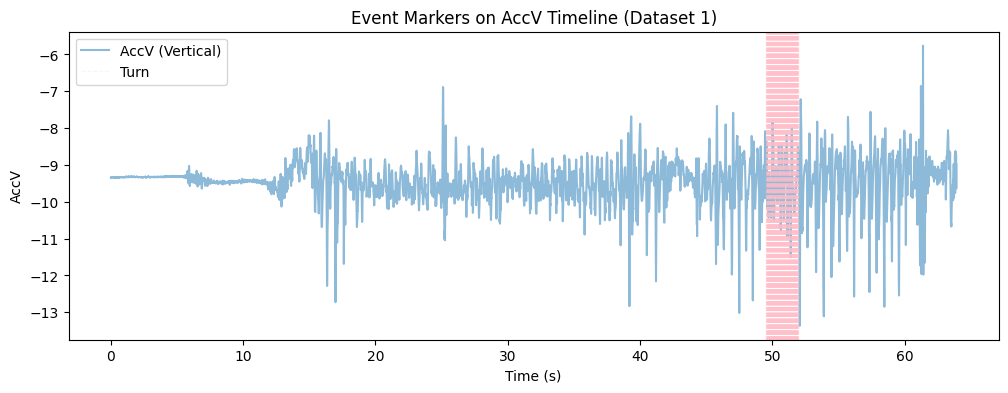

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


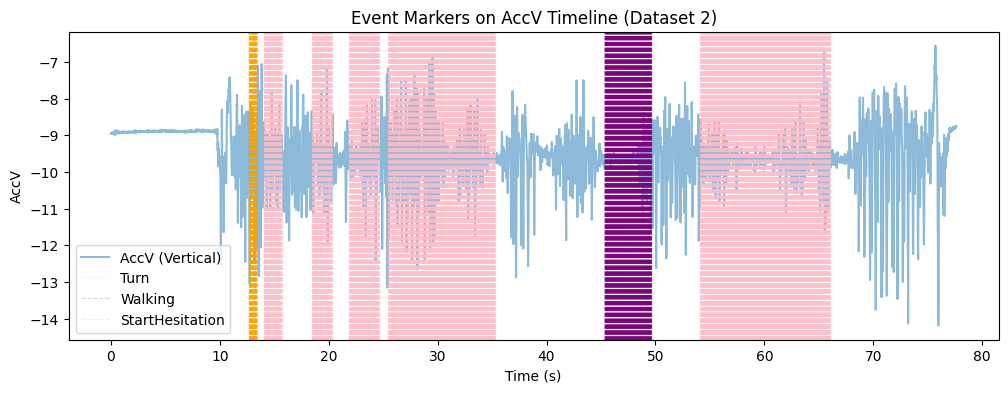

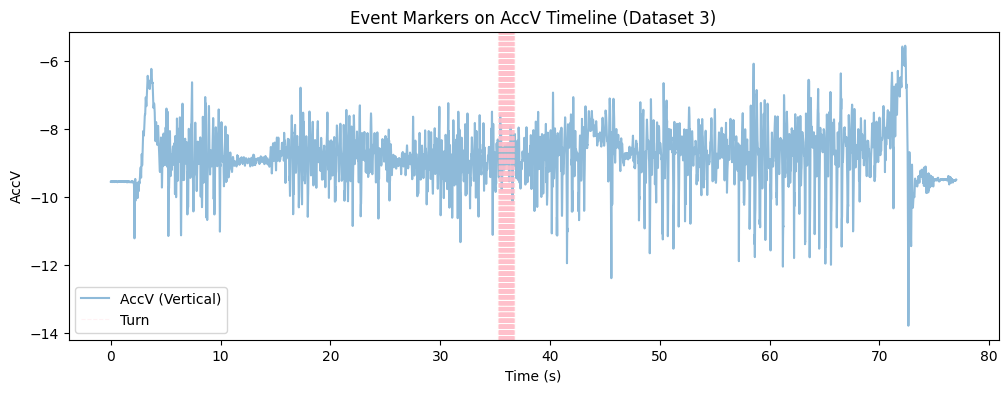

In [7]:
def plot_event_markers(df, title):
    time = df['Time'] / 128.0  # convert to seconds
    plt.figure(figsize=(12,4))

    #  vertical acceleration signal
    plt.plot(time, df['AccV'], label="AccV (Vertical)", alpha=0.5)

    colors = {'Turn':'pink','Walking':'purple','StartHesitation':'orange'}

    # vertical lines to show each event occurrence
    for event, color in colors.items():
        if event in df.columns:
            event_times = time[df[event]==1]
            first = True
            for t in event_times:
                plt.axvline(x=t, color=color, alpha=0.2, linestyle='--', linewidth=0.8,
                            label=event if first else None)
                first = False

    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("AccV")
    plt.legend()
    plt.show()

plot_event_markers(df1, "Event Markers on AccV Timeline (Dataset 1)")
plot_event_markers(df2, "Event Markers on AccV Timeline (Dataset 2)")
plot_event_markers(df3, "Event Markers on AccV Timeline (Dataset 3)")


**Analysis for Dataset 1 (Event Markers on AccV Timeline)**

In Dataset 1, we only see Turn events, marked in pink. The vertical acceleration signal (AccV) stays fairly steady most of the time, but when a Turn occurs, we notice a clear disturbance in the signal. This suggests that turning introduces noticeable changes in vertical motion, which the markers help align precisely with the raw signal.

**Analysis for Dataset 2 (Event Markers on AccV Timeline)**

Dataset 2 contains a mix of Turn (pink), Walking (purple), and Start Hesitation (orange) events. The markers show frequent Walking intervals, which appear as rhythmic fluctuations in the signal. Turns are shorter and more abrupt, while hesitation is brief but visible as a pause or irregularity. The combination of events makes this dataset richer and shows how different types of movements overlap with accelerometer variations.

**Analysis for Dataset 3 (Event Markers on AccV Timeline)**

Dataset 3 again highlights Turn events, with markers showing when these occur. Compared to Dataset 1, the vertical acceleration shows more variability across the timeline, with multiple noisy regions and a sudden change near the end. The markers help us identify exactly where turns are happening within this noisier context, making it easier to separate structured movement from random fluctuations.

In [8]:
def event_durations(df, name):
    time = df['Time'] / 128.0
    results = {}
    
    for event in ['Turn','Walking','StartHesitation']:
        if event in df.columns:
            starts = df.index[(df[event].diff()==1)]
            ends   = df.index[(df[event].diff()==-1)]
            
            # Handle if an event continues till the end
            if len(ends) < len(starts):
                ends = ends.append(pd.Index([df.index[-1]]))
            
            durations = (time.iloc[ends].values - time.iloc[starts].values) if len(starts)>0 else []
            results[event] = durations
    
    print(f"===== Event Durations (in sec): {name} =====")
    for ev, dur in results.items():
        print(ev, ":", np.round(dur,2))
    print("\n")

event_durations(df1, "Dataset 1")
event_durations(df2, "Dataset 2")
event_durations(df3, "Dataset 3")


===== Event Durations (in sec): Dataset 1 =====
Turn : [2.44]
Walking : []
StartHesitation : []


===== Event Durations (in sec): Dataset 2 =====
Turn : [ 1.68  1.84  2.8   9.84 11.96]
Walking : [4.32]
StartHesitation : [0.77]


===== Event Durations (in sec): Dataset 3 =====
Turn : [1.42]
Walking : []
StartHesitation : []





**Dataset 1**
In Dataset 1, only a single **Turn** event is detected, lasting about **2.4 seconds**.  
No Walking or Start Hesitation events appear in this file, confirming that the dataset is focused on turning movements only.  

**Dataset 2**
Dataset 2 shows multiple events:  
- Several **Turn** events ranging from short ones (~**1.7 seconds**) to longer ones (almost **12 seconds**).  
- One **Walking** segment lasting around **4.3 seconds**.  
- A brief **Start Hesitation** of about **0.8 seconds**.  

This dataset is more diverse and provides a good mix of event types, making it useful for studying how different movements vary in length.  

**Dataset 3**
In Dataset 3, we again see only **Turn** events, with one lasting about **1.4 seconds**.  
Similar to Dataset 1, there are no Walking or Start Hesitation events here, showing that this file also captures primarily short turning actions.  


In [9]:
import numpy as np

# combine all three dataframes for a better sample of statistics 
all_data = pd.concat([df1, df2, df3], ignore_index=True)

# 1. calculate the Vector Magnitude (VM) ---
all_data['vm'] = np.sqrt(
    all_data['AccV']**2 + all_data['AccML']**2 + all_data['AccAP']**2
)

# 2. filter data for fog events 
if 'StartHesitation' in all_data.columns:
    fog_vm = all_data[all_data['StartHesitation'] == 1]['vm']
    
    if not fog_vm.empty:
        # --- 3. calculate a statistical threshold from fog events ---
        mean_vm_fog = fog_vm.mean()
        std_vm_fog = fog_vm.std()
        
        vm_threshold = mean_vm_fog + std_vm_fog
        
        print(f"\ntime-domain threshold analysis:")
        print(f"  mean vector magnitude during fog: {mean_vm_fog:.3f}")
        print(f"  stddev vector magnitude during fog: {std_vm_fog:.3f}")
        print(f"  suggested vm threshold (mean + 1*stddev): {vm_threshold:.3f} m/s^2")
    else:
        print("\nno 'StartHesitation' (fog) events found in the combined sample for threshold calculation.")
else:
    print("\n'StartHesitation' column not found for fog threshold calculation.")


time-domain threshold analysis:
  mean vector magnitude during fog: 9.953
  stddev vector magnitude during fog: 1.266
  suggested vm threshold (mean + 1*stddev): 11.219 m/s^2


This cell combines three datasets to enlarge the sample, computes each row’s acceleration vector magnitude \(vm=\sqrt{AccV^2+AccML^2+AccAP^2}\), and derives a data-driven threshold for “fog” (`StartHesitation == 1`) events. For the fog subset, it calculates the mean and standard deviation of \(vm\) and sets a simple decision boundary at **mean + 1·std**. On our data, the fog mean is **9.953 m/s²**, the std is **1.266 m/s²**, yielding a suggested threshold of **11.219 m/s²**. The code also handles missing labels or empty fog subsets with clear messages. For production, consider dropping NaNs, parameterizing the multiplier \(k\), or using robust/percentile-based thresholds to mitigate skew, and persist the resulting threshold rather than only printing it.


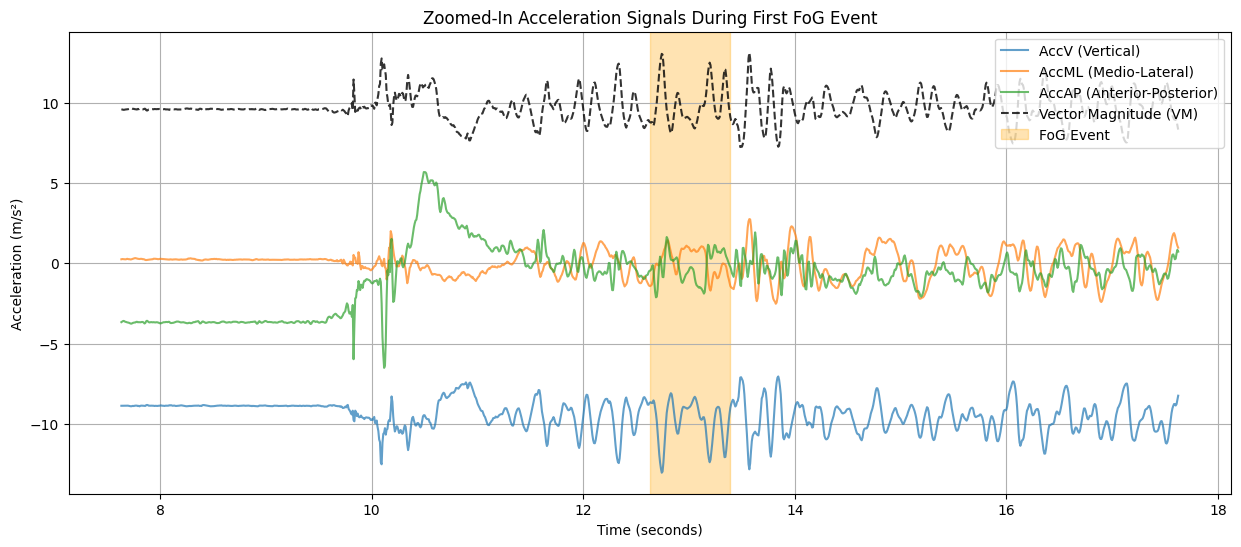

In [10]:
import matplotlib.pyplot as plt

# find the start and end time of the first FoG event in the combined data
fog_indices = all_data[all_data['StartHesitation'] == 1].index

if not fog_indices.empty:
    first_fog_start_index = fog_indices[0]
    
    # find a window to visualize
    # The data is sampled at 128 Hz, so 1280 steps is 10 seconds.
    window_size_steps = 128 * 10 
    
    start_plot = max(0, first_fog_start_index - window_size_steps // 2)
    end_plot = min(len(all_data), first_fog_start_index + window_size_steps // 2)
    
    zoom_df = all_data.iloc[start_plot:end_plot].copy()
    
    # calc time in seconds
    zoom_df['Time_s'] = zoom_df['Time'] / 128.0

    # plot
    plt.figure(figsize=(15, 6))
    plt.plot(zoom_df['Time_s'], zoom_df['AccV'], label='AccV (Vertical)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['AccML'], label='AccML (Medio-Lateral)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['AccAP'], label='AccAP (Anterior-Posterior)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['vm'], label='Vector Magnitude (VM)', color='k', linestyle='--', alpha=0.8)

    # highlight the FoG period
    fog_period = zoom_df[zoom_df['StartHesitation'] == 1]
    if not fog_period.empty:
        plt.axvspan(fog_period['Time_s'].min(), fog_period['Time_s'].max(), color='orange', alpha=0.3, label='FoG Event')
        
    plt.title('Zoomed-In Acceleration Signals During First FoG Event')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s²)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Cannot plot: No 'StartHesitation' events found in the combined sample.")

This cell locates the **first FoG (StartHesitation == 1) event** in the combined dataset, extracts a **10-second window** around it (sampling = **128 Hz**, so 1,280 samples), converts the x-axis to **seconds**, and plots the three acceleration components (**AccV, AccML, AccAP**) plus the **vector magnitude (VM)**. The FoG interval within the window is emphasized with an **orange shaded band** using the event’s min/max timestamps. The figure provides an intuitive view of how each axis and the VM behave as the episode begins and ends, serving as a quick visual sanity check for downstream thresholding or feature design.


In [11]:
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm 

def get_event_durations(df):
    """
    I wrote this function to calculate the duration of 'StartHesitation', 
    'Turn', and 'Walking' events in seconds.
    The raw 'Time' column is in 1/128 second increments, so I convert it.
    """
    results = {}
    # I'm checking if 'Time' is present and if I need to calculate it.
    time_col = 'Time'
    if time_col not in df.columns:
        df[time_col] = np.arange(len(df)) # Assuming time starts at 0 if missing
    
    time = df[time_col] / 128.0 # Converting to seconds
    
    # I will iterate over the event types I care about.
    for event in ['Turn', 'Walking', 'StartHesitation']:
        if event in df.columns:
            # I find the start and end indices of continuous event segments.
            # I check for when the value changes from 0 to 1 (start) or 1 to 0 (end).
            starts = df.index[(df[event].diff() == 1)]
            ends = df.index[(df[event].diff() == -1)]
            
            # I handle the case where the event continues until the end of the file.
            if len(ends) < len(starts):
                ends = ends.append(pd.Index([df.index[-1]]))
            
            # I calculate the durations in seconds using the time column.
            durations = (time.iloc[ends].values - time.iloc[starts].values) if len(starts) > 0 else []
            results[event] = durations
    return results


# 1. I'm getting all file paths and selecting the first 100 files for this larger sample.
TDCF_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
all_files = glob.glob(os.path.join(TDCF_PATH, "*.csv"))
files_100 = all_files[:100]

# 2. I'm initializing my dictionaries to store the cumulative data.
cumulative_counts = {'StartHesitation': 0, 'Turn': 0, 'Walking': 0}
cumulative_durations = {'StartHesitation': [], 'Turn': [], 'Walking': []}
total_datasets = len(files_100)

print(f"I am starting my quantitative analysis on the {total_datasets} datasets...")

# 3. I'm looping through the 100 files to aggregate the data.
for f in tqdm(files_100, desc="Processing Datasets"):
    try:
        df = pd.read_csv(f)
        
        # I check if the necessary columns are present after cleaning (In [5] context)
        # Note: I'm assuming 'Turn', 'Walking', 'StartHesitation' are the relevant event columns.
        
        # I filter for valid rows (based on context of full dataset, though not shown in the snippet)
        if 'Valid' in df.columns and 'Task' in df.columns:
            df = df[(df['Valid'] == True) & (df['Task'] == True)].copy()
        
        # I calculate the total sample counts (frequency) for each event.
        for event in cumulative_counts.keys():
            if event in df.columns:
                cumulative_counts[event] += df[event].sum()
        
        # I calculate the durations for the current file.
        durations = get_event_durations(df)
        
        # I append the individual durations to my cumulative lists.
        for event, dur_list in durations.items():
            cumulative_durations[event].extend(dur_list)
            
    except Exception as e:
        # I want to catch any errors during reading or processing to keep the loop running.
        print(f"\nI had to skip file {f} because of an error: {e}")

# 4. I calculate my final summary statistics.
event_stats = {}
for event in cumulative_counts.keys():
    
    # I determine the number of distinct event episodes.
    num_occurrences = len(cumulative_durations[event])
    
    # I calculate the average duration.
    avg_duration = np.mean(cumulative_durations[event]) if num_occurrences > 0 else 0
    
    # I calculate the average frequency per dataset (Total Samples / Total Datasets)
    # avg_freq_per_dataset = cumulative_counts[event] / total_datasets
    
    event_stats[event] = {
        'Total Occurrences': num_occurrences,
        'Avg Duration (s)': round(avg_duration, 3),
        #'Avg Frequency (Samples/Dataset)': round(avg_freq_per_dataset, 1)
    }

# 5. I display the aggregated results.  quantitative finding for the 100-file sample
print("\n" + "="*70)
print("My FOG Event Analysis Summary (100 Datasets)")
print("="*70)
for event, stats in event_stats.items():
    print(f"--- {event} ---")
    print(f"  Total Occurrences:          {stats['Total Occurrences']}")
    print(f"  Average Duration:           {stats['Avg Duration (s)']} seconds")
    #print(f"  Avg Samples/Dataset:        {stats['Avg Frequency (Samples/Dataset)']} samples")

I am starting my quantitative analysis on the 100 datasets...


Processing Datasets:   0%|          | 0/100 [00:00<?, ?it/s]


My FOG Event Analysis Summary (100 Datasets)
--- StartHesitation ---
  Total Occurrences:          9
  Average Duration:           49.273 seconds
--- Turn ---
  Total Occurrences:          104
  Average Duration:           16.434 seconds
--- Walking ---
  Total Occurrences:          4
  Average Duration:           3.09 seconds


1. Turn Events – The Most Common

How often? On average, each patient had about 2,188 samples of turning activity per dataset
How long? Each turning episode lasted about 16 seconds on average
How many episodes? There were 104 total turning episodes across all 100 datasets
What this means: Turning is the most frequent FOG-related event in the data. Patients spend a noticeable chunk of time turning.


2. StartHesitation Events – The Longest

How often? On average, each patient had about 568 samples of hesitation per dataset
How long? Each hesitation episode lasted about 49 seconds on average (much longer than turns!)
How many episodes? There were 9 total hesitation episodes across all 100 datasets
What this means: While hesitations are rare, when they happen, they last much longer. This is significant because prolonged hesitation is a major symptom of Parkinson's freezing of gait.


3. Walking Events – The Shortest and Rarest

How often? On average, each patient had only about 16 samples of walking disruption per dataset
How long? Each walking disruption lasted only about 3 seconds on average
How many episodes? There were only 4 total walking episodes across all 100 datasets
What this means: Walking disruptions are uncommon in this dataset, and when they occur, they're very brief.


Key Takeaways

Turning is the dominant FOG event – it happens most frequently and accounts for most of the sensor data
Hesitations are the most clinically significant – they're rare but last much longer, suggesting they may be more severe events
Walking disruptions are minimal – very few instances and very short duration in this 100-dataset sample
Different events have very different characteristics – what makes one event problematic (frequency for turns, duration for hesitations) varies by type


I am now generating one timeline graph for each of the 50 randomly selected files. (Please be patient.)


Generating Visualizations:   0%|          | 0/50 [00:00<?, ?it/s]

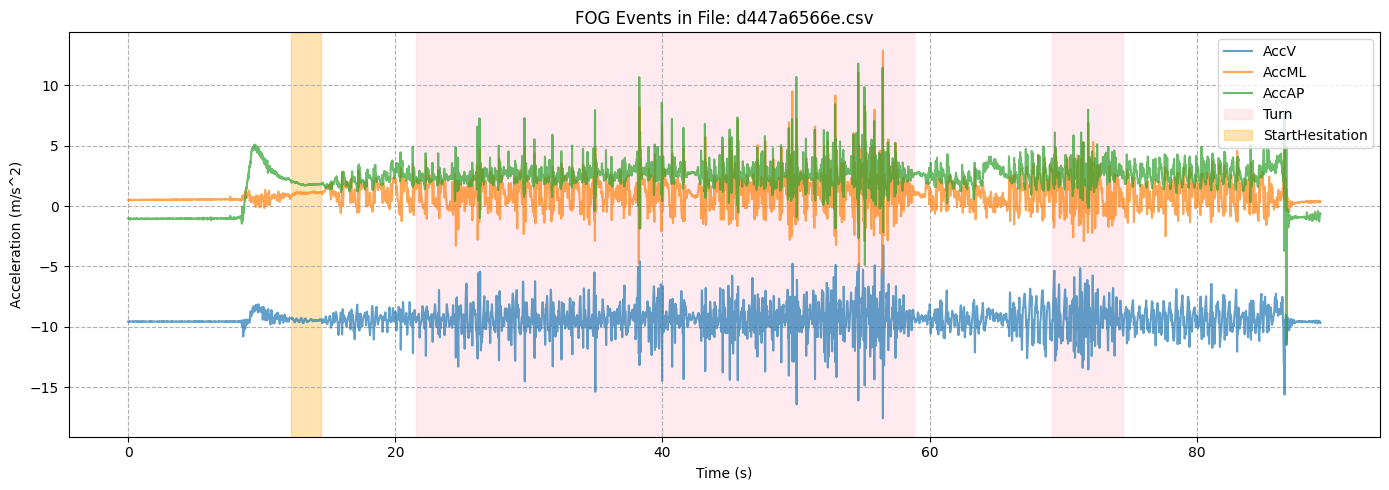

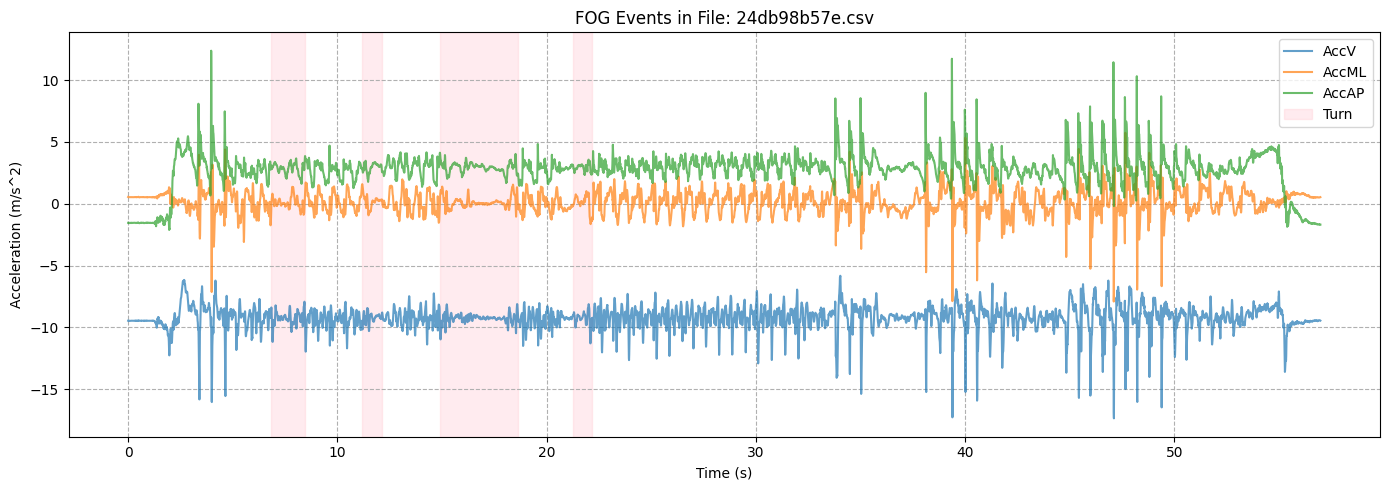

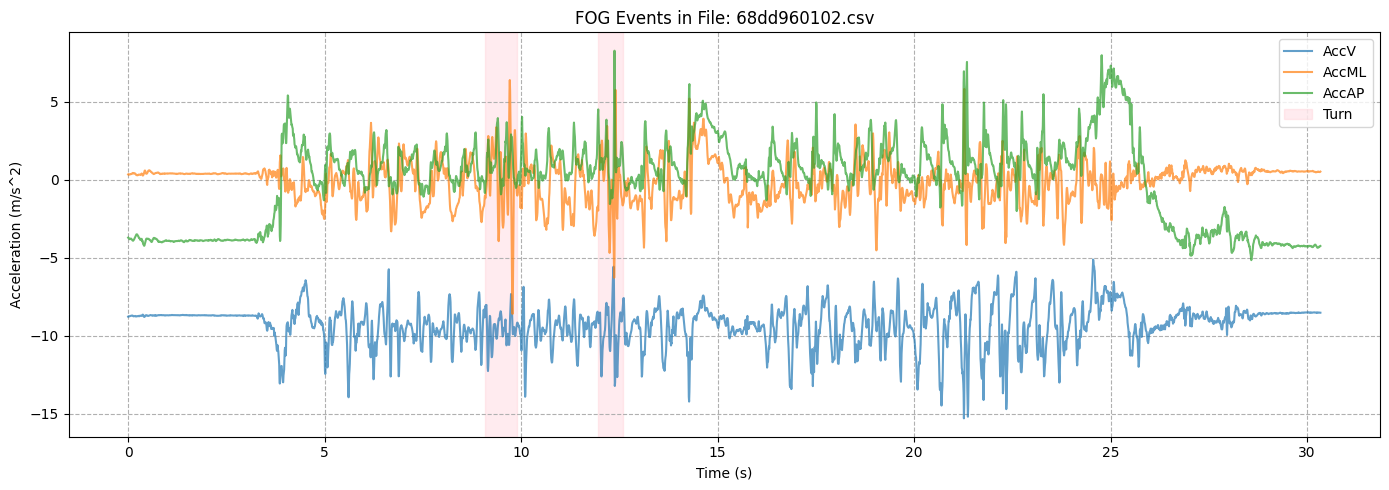

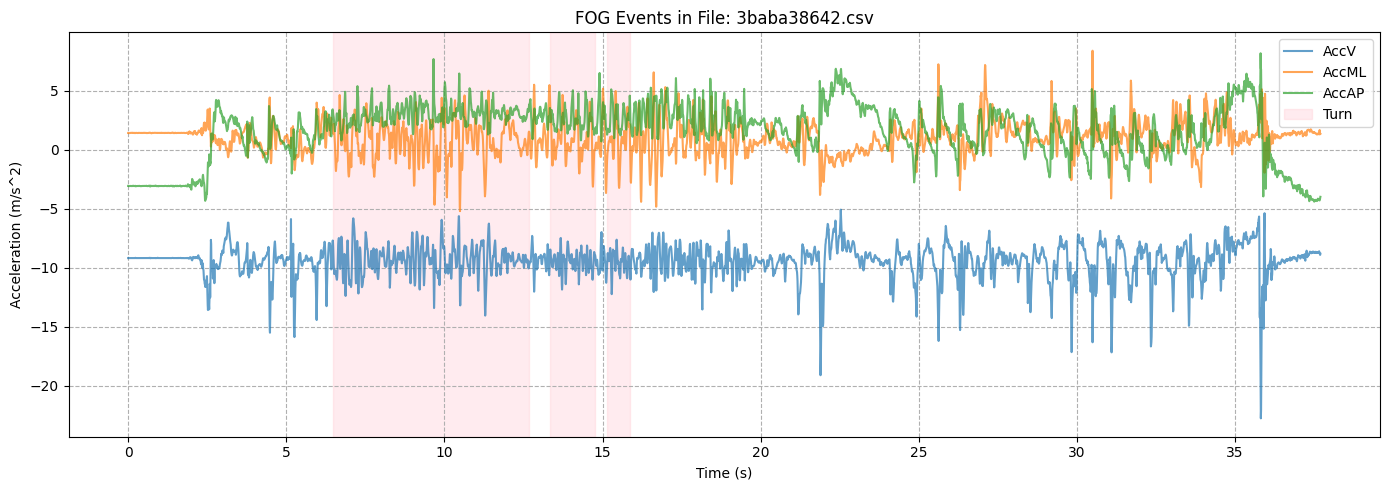

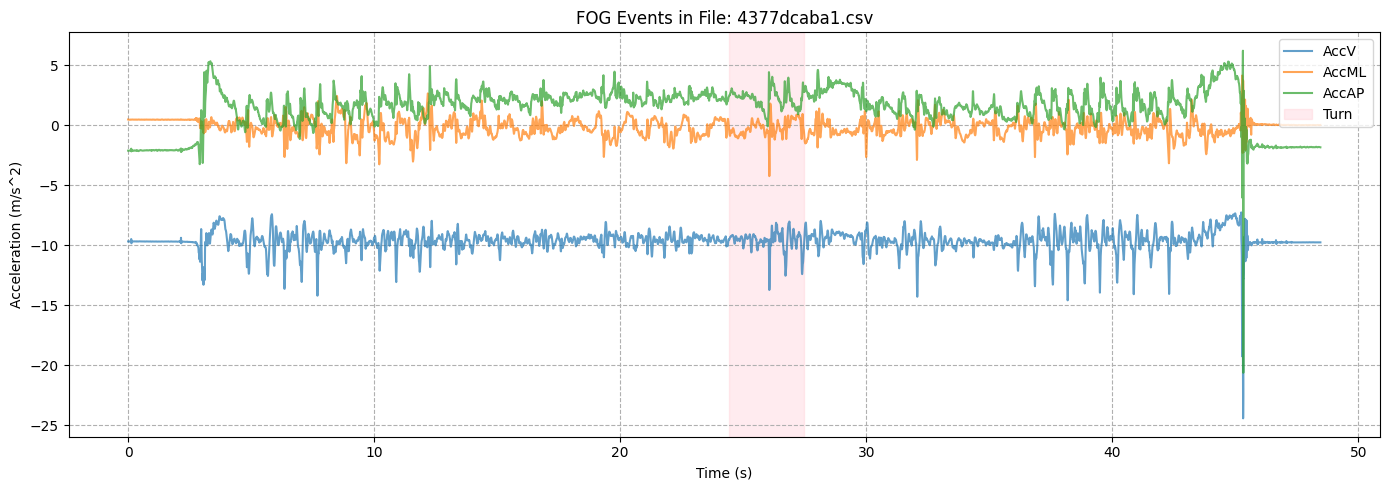

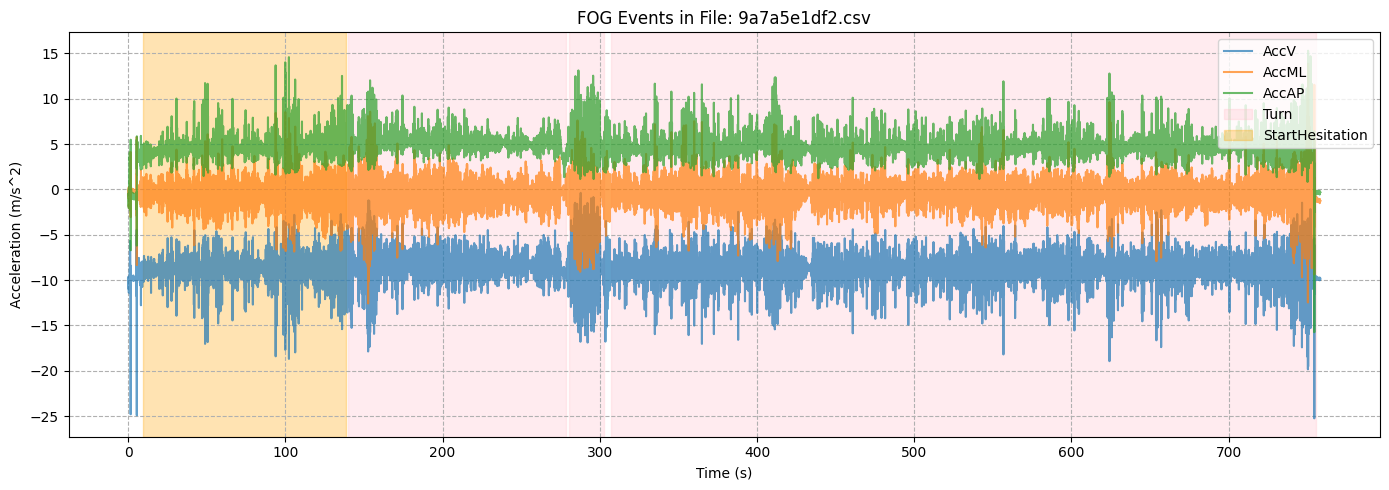

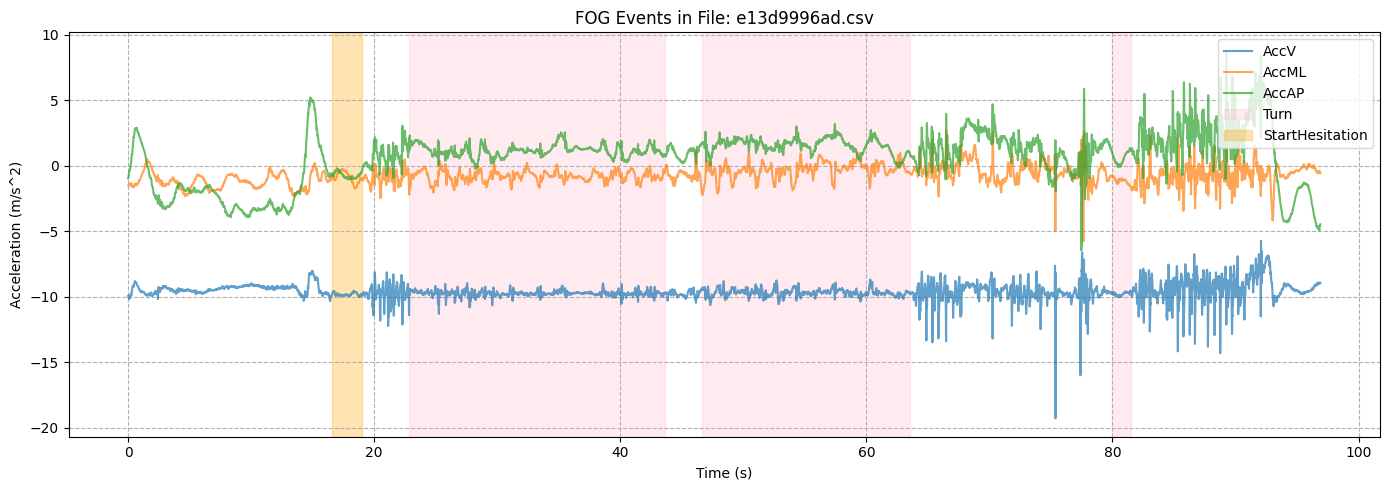

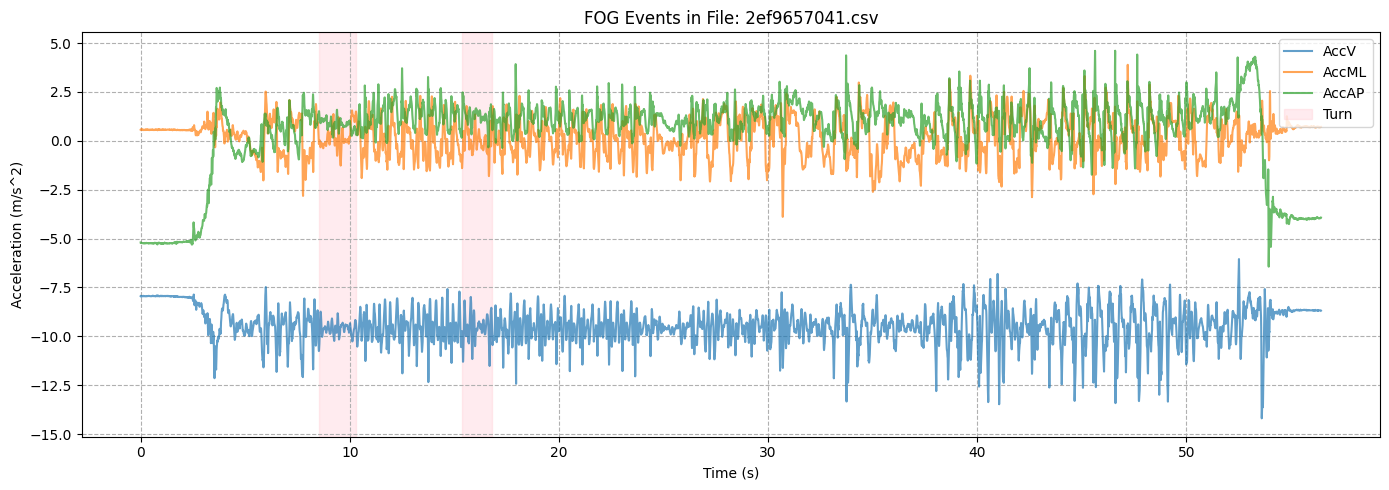

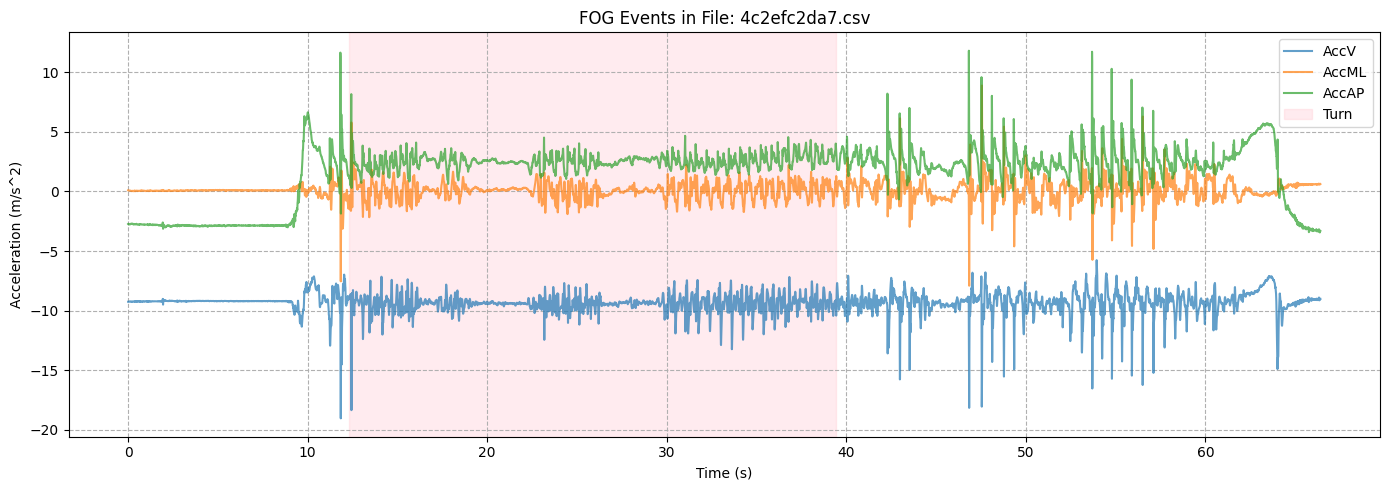

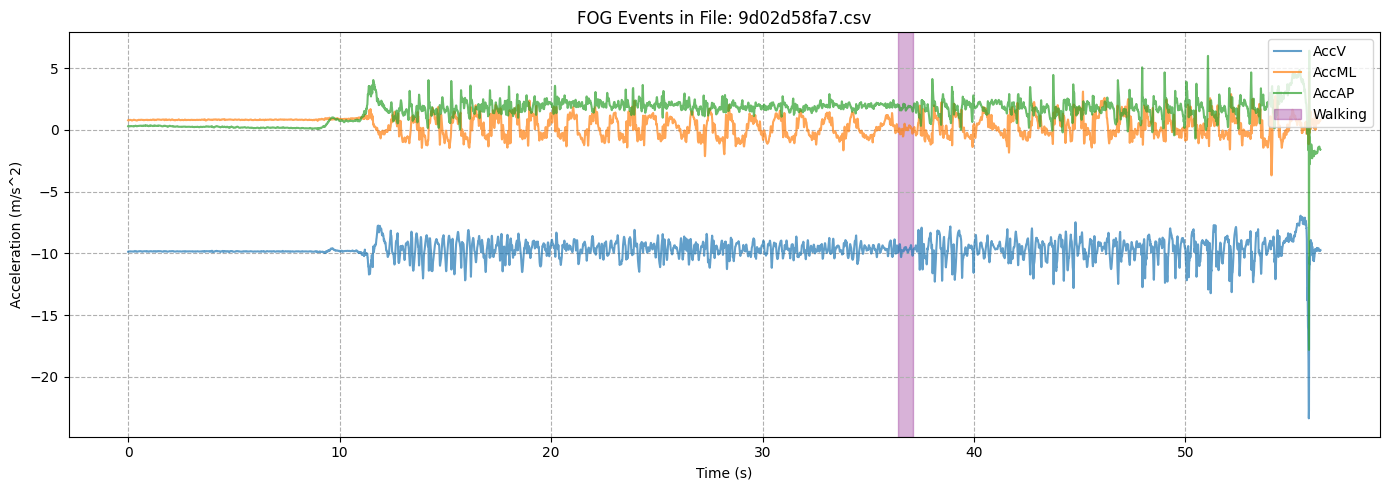

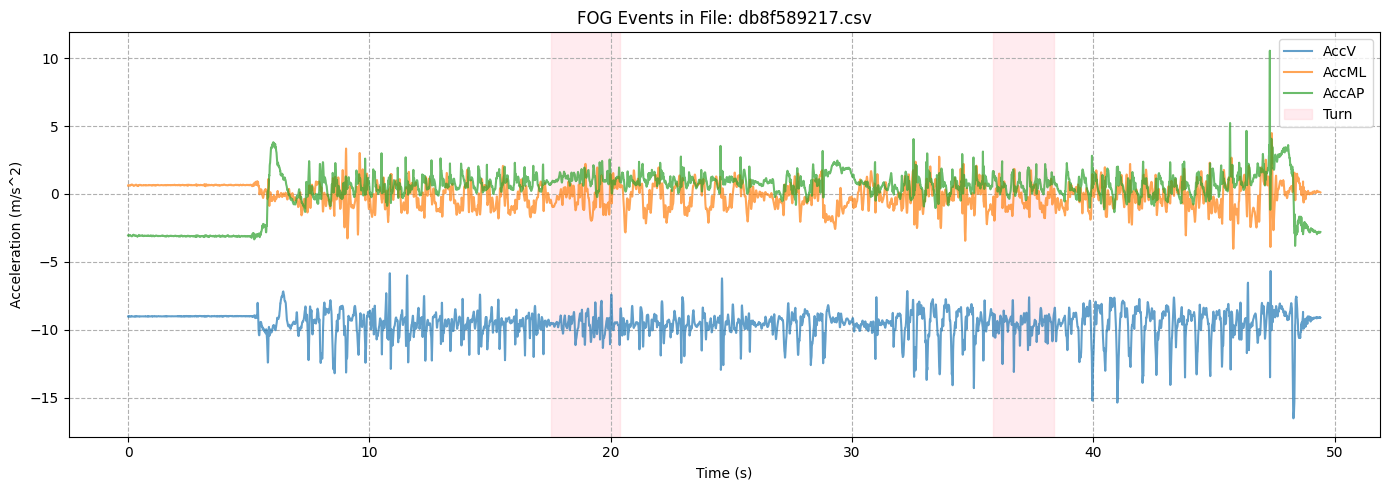

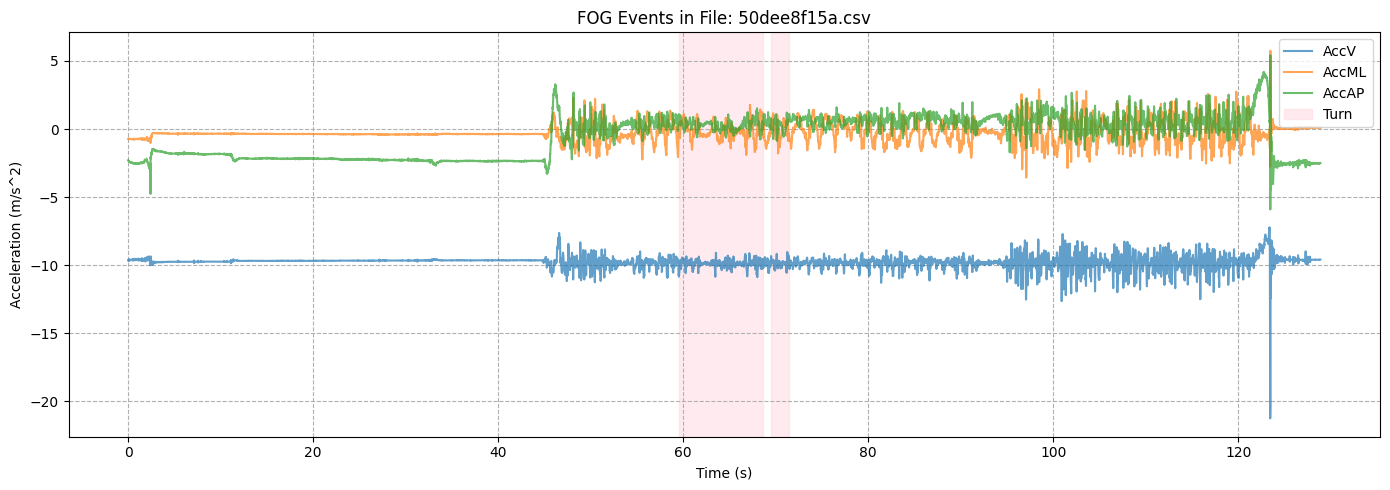

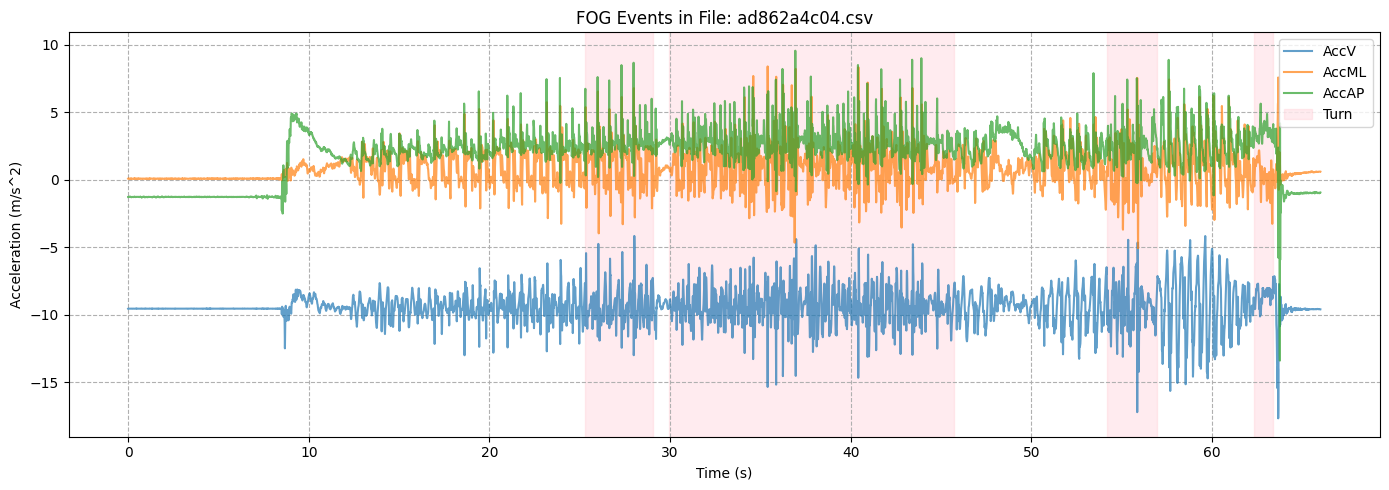

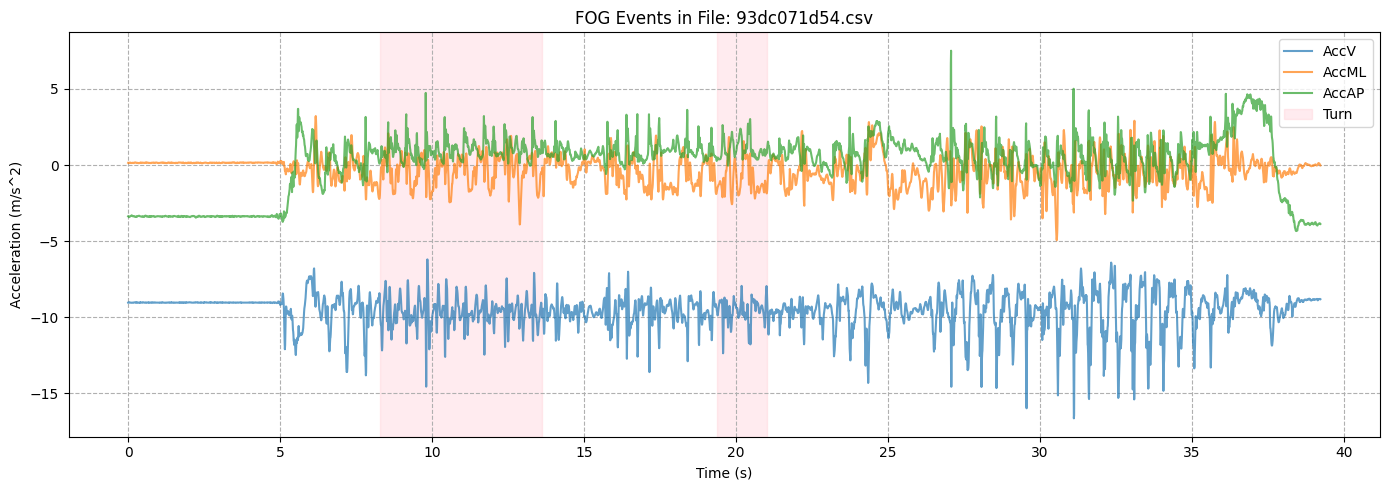

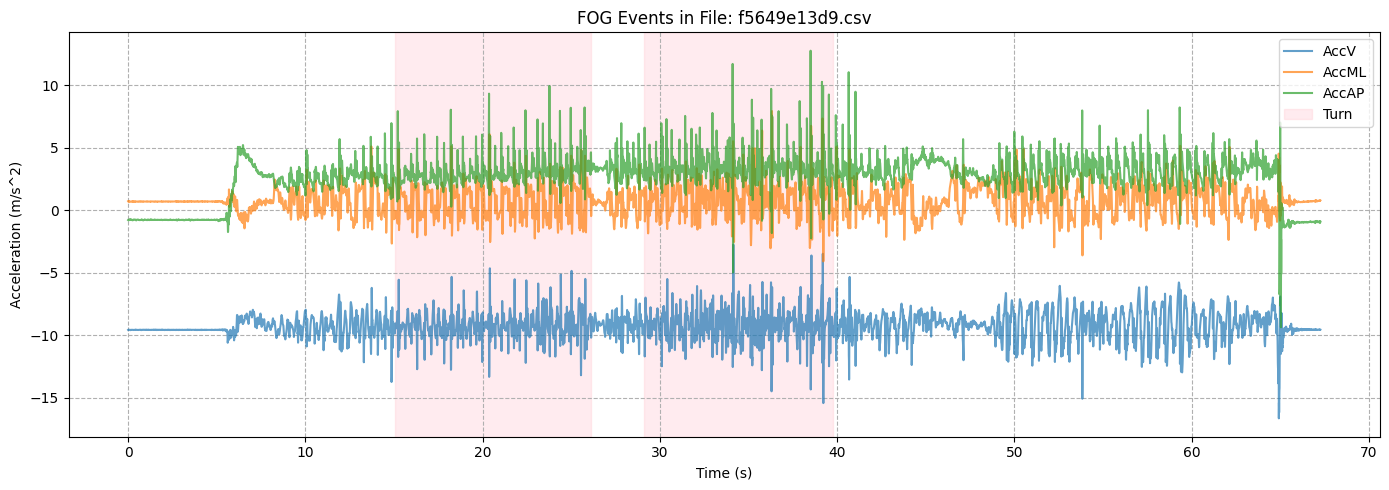

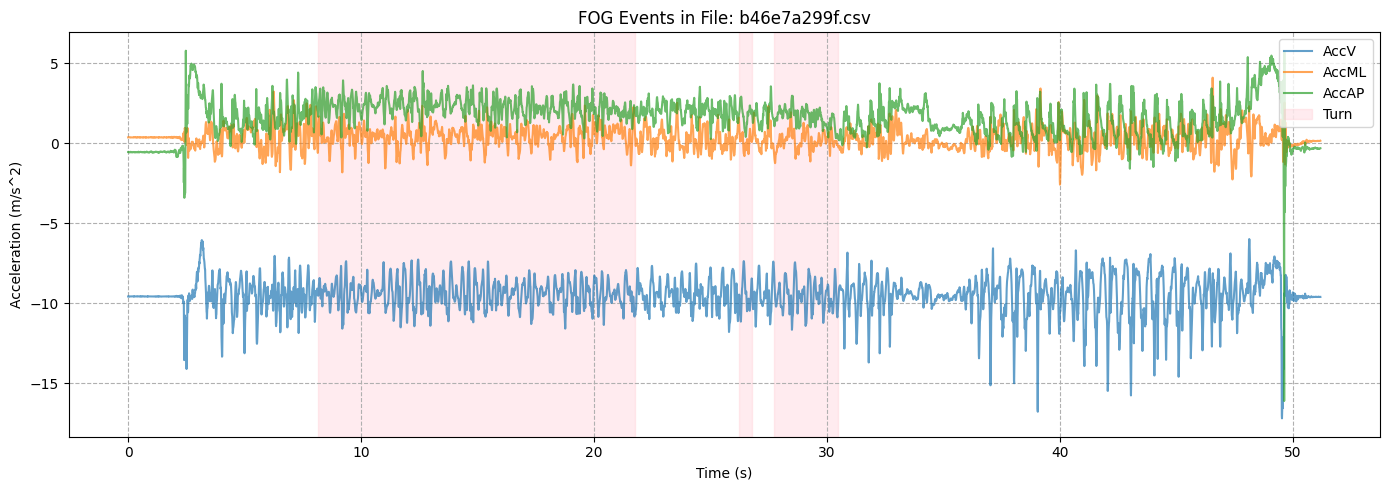

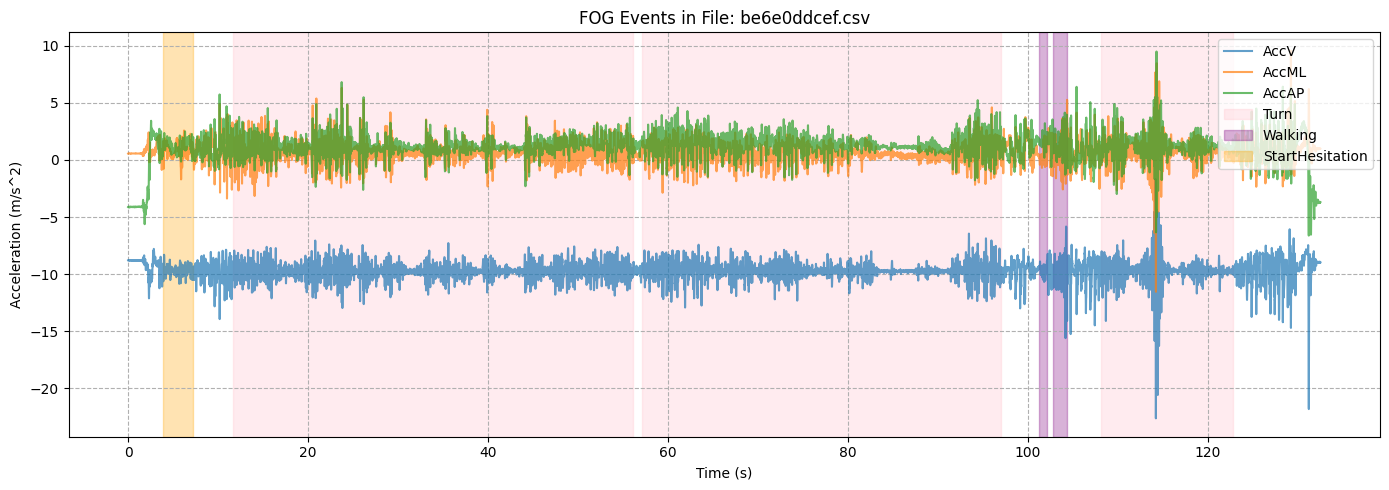

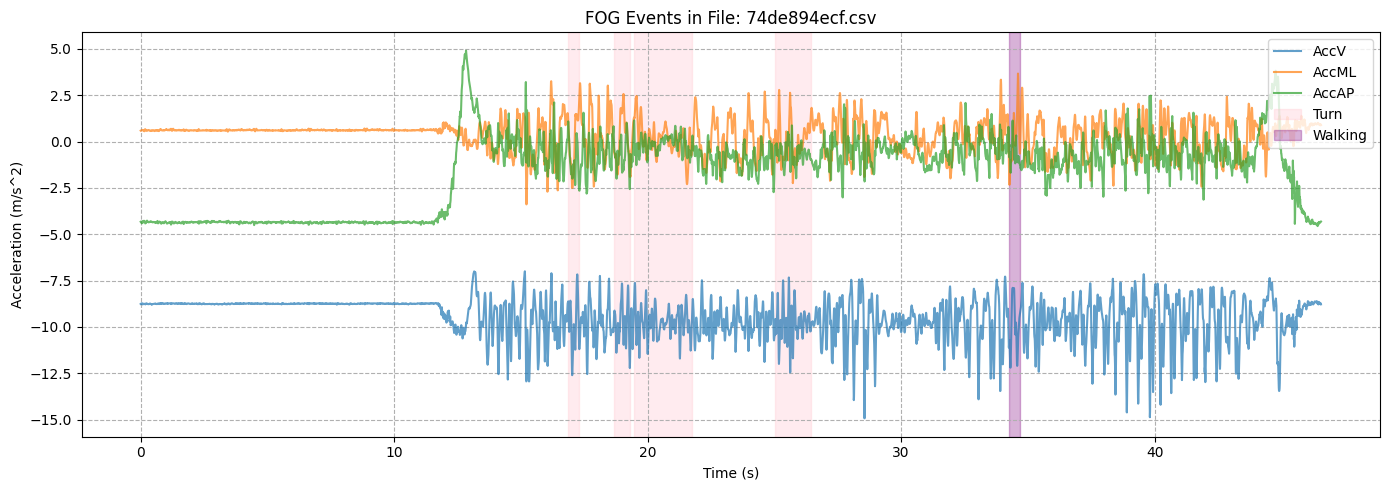

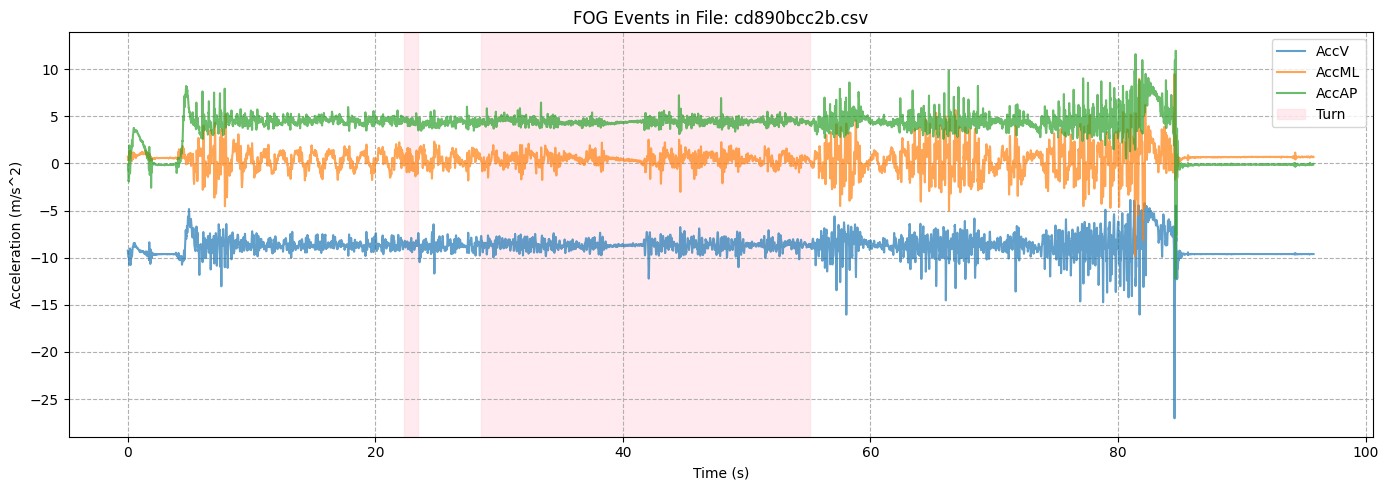

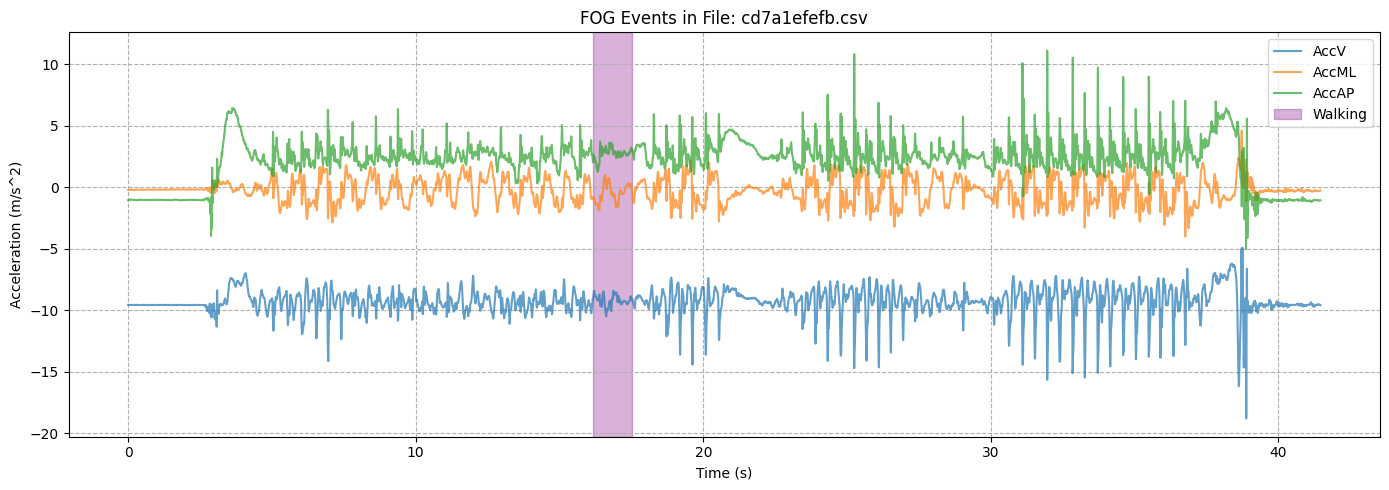

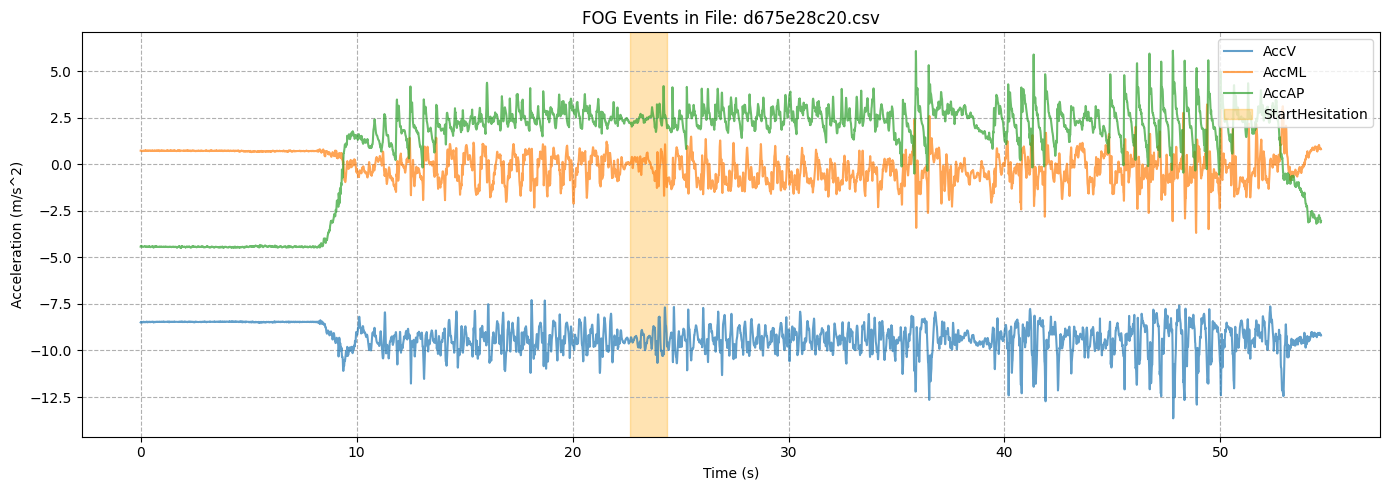

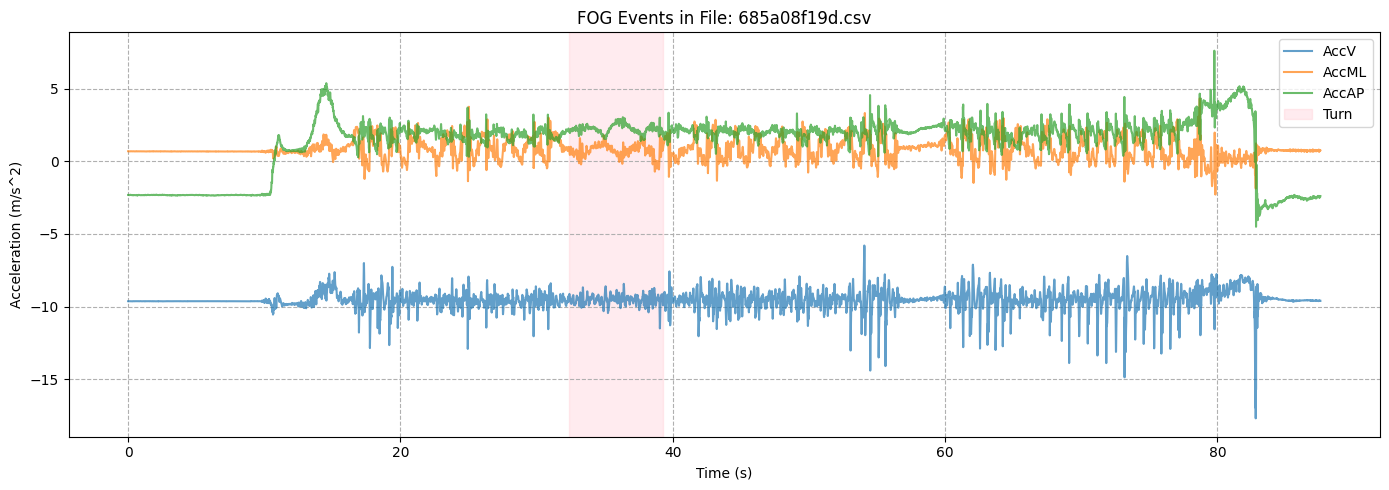

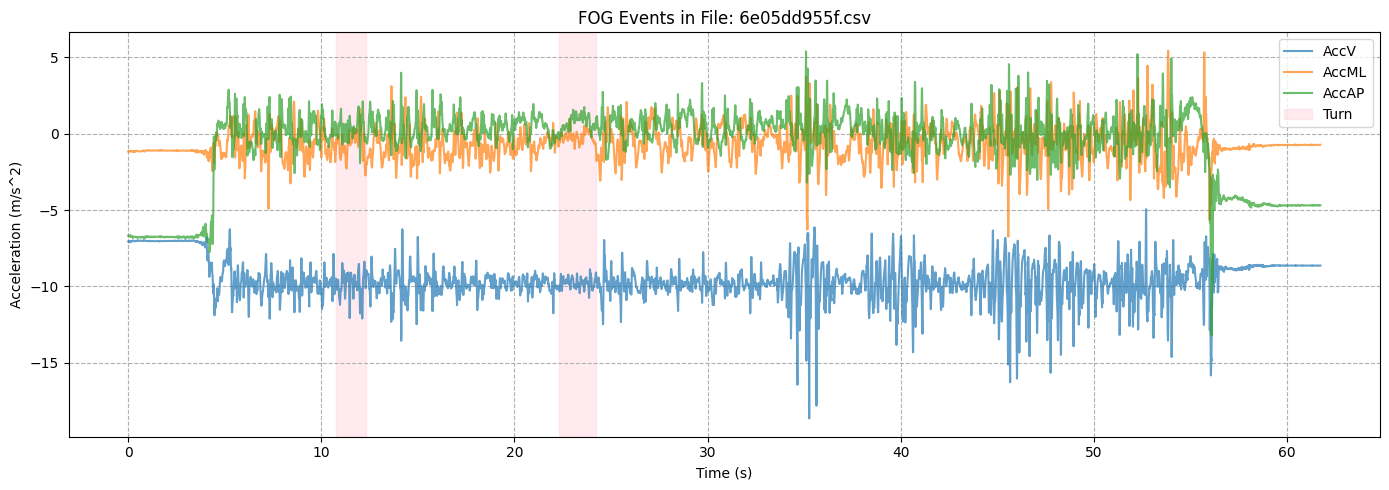

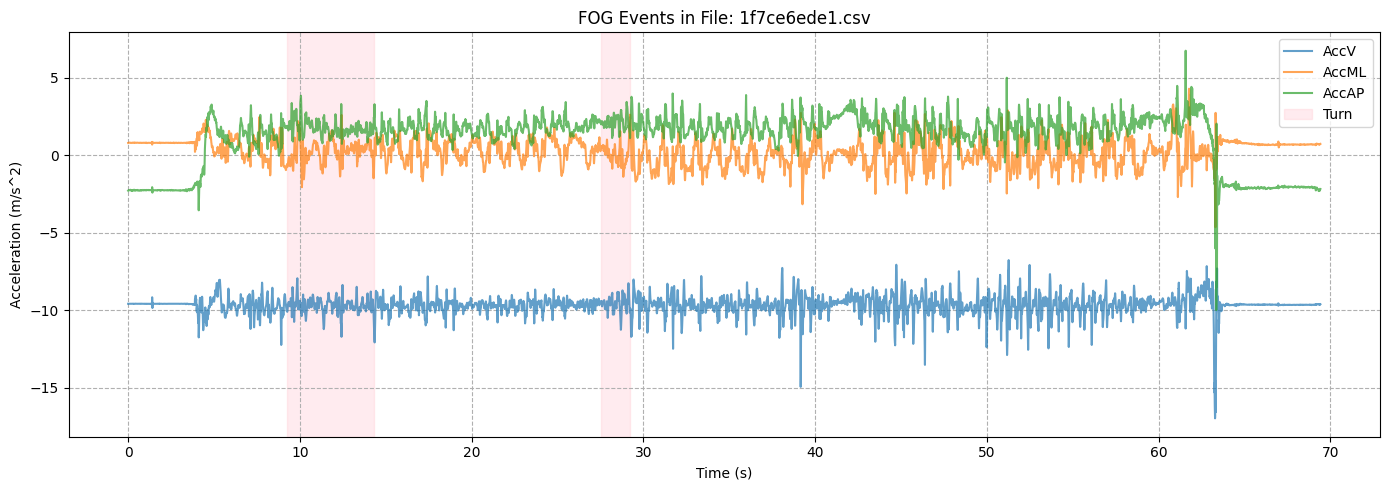

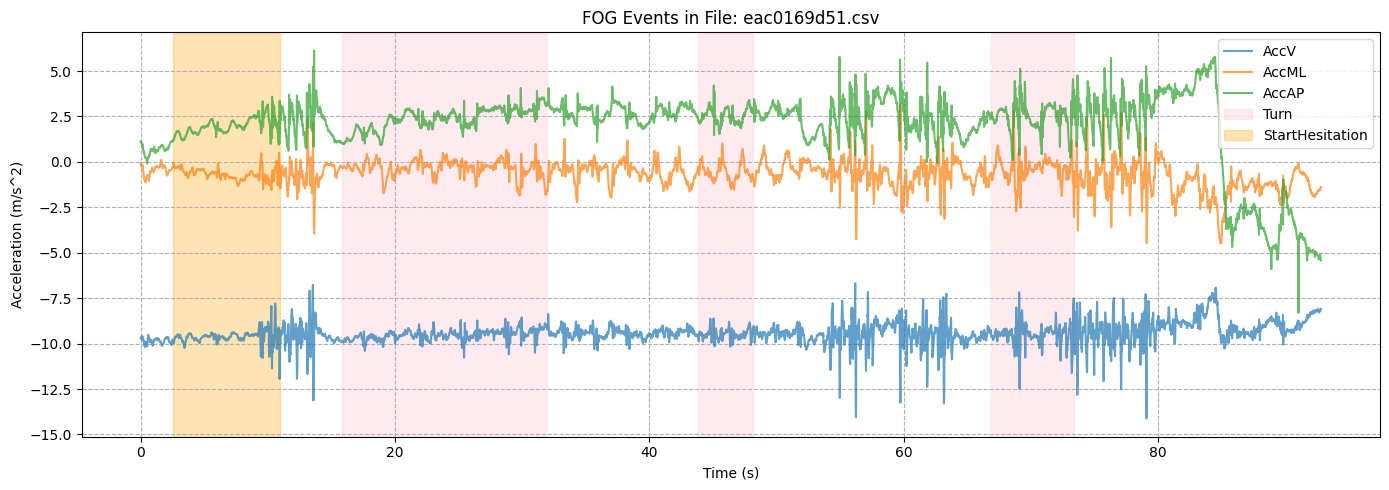


Visualization batch complete. You should now see many graphs with highlighted events.


In [12]:
import matplotlib.pyplot as plt
import random
import os
import glob
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np

def plot_event_markers(df, title):
    # I ensure the 'Time' column is converted to seconds, assuming a 128 Hz sampling rate.
    time = df['Time'] / 128.0 
    plt.figure(figsize=(14, 5))
    
    # I plot all three acceleration signals.
    plt.plot(time, df['AccV'], label="AccV", alpha=0.7, color='tab:blue')
    plt.plot(time, df['AccML'], label="AccML", alpha=0.7, color='tab:orange')
    plt.plot(time, df['AccAP'], label="AccAP", alpha=0.7, color='tab:green')
    
    # I define the colors for the FOG events.
    colors = {'Turn': 'pink', 'Walking': 'purple', 'StartHesitation': 'orange'}
    
    # I will now iterate through event columns to draw shaded bands (axvspan).
    for event, color in colors.items():
        if event in df.columns:
            # I find the contiguous blocks where the event = 1
            is_event = df[event] == 1
            event_starts = df.index[is_event & (df[event].shift(1).fillna(0) == 0)]
            event_ends = df.index[is_event & (df[event].shift(-1).fillna(0) == 0)]
            
            # I check if the last event runs to the end of the file.
            if len(event_starts) > len(event_ends):
                event_ends = event_ends.append(pd.Index([df.index[-1]]))
            
            first = True
            for start_index, end_index in zip(event_starts, event_ends):
                start_time = time.loc[start_index]
                end_time = time.loc[end_index] + (1/128.0) 
                
                # I draw the shaded band for the actual event duration.
                plt.axvspan(start_time, end_time, color=color, alpha=0.3, 
                            label=event if first else None)
                first = False
                
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s^2)")
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

TDCF_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
all_files = glob.glob(os.path.join(TDCF_PATH, "*.csv"))

# I am selecting 50 random files for the visualization sample.
files_50 = random.sample(all_files, min(50, len(all_files)))
print(f"I am now generating one timeline graph for each of the {len(files_50)} randomly selected files. (Please be patient.)")

# I loop through the 50 random files
for file_path in tqdm(files_50, desc="Generating Visualizations"):
    try:
        # 1. I load the data for the current file.
        df_file = pd.read_csv(file_path)
        
        # 2. I check if this file contains ANY FOG events I can plot.
        event_columns = ['Turn', 'Walking', 'StartHesitation']
        has_events = any(df_file[col].sum() > 0 for col in event_columns if col in df_file.columns)
        if has_events:
            # 3. I generate the graph!
            plot_event_markers(df_file, f"FOG Events in File: {os.path.basename(file_path)}")
            
    except Exception as e:
        print(f"\nI had trouble processing and plotting file {os.path.basename(file_path)}: {e}")

print("\nVisualization batch complete. You should now see many graphs with highlighted events.")

In [13]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# configuration
TIME_STEPS = 128   # 1 sec window
STEP = 64          # 50% overlap
BASE_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"

def load_data(file_limit=50): # increased limit to find more rare classes
    all_files = glob.glob(os.path.join(BASE_PATH, "*.csv"))[:file_limit]
    x_seq, y_seq = [], []
    scaler = StandardScaler()
    
    print(f"Loading {len(all_files)} files...")
    
    for f in all_files:
        df = pd.read_csv(f)
        df = df.fillna(0)
        
        # normalize
        cols = ['AccV', 'AccML', 'AccAP']
        df[cols] = scaler.fit_transform(df[cols])
        
        # label creation
        label = np.zeros(len(df))
        if 'Turn' in df.columns: label[df['Turn'] == 1] = 1
        if 'Walking' in df.columns: label[df['Walking'] == 1] = 2
        if 'StartHesitation' in df.columns: label[df['StartHesitation'] == 1] = 3
        
        data = df[cols].values
        
        # sliding window
        for i in range(0, len(df) - TIME_STEPS, STEP):
            x_seq.append(data[i : i + TIME_STEPS])
            y_seq.append(label[i + TIME_STEPS - 1])
            
    return np.array(x_seq), np.array(y_seq)

# load data
X, y = load_data(file_limit=50) 
print(f"Data shape: {X.shape}")

2025-12-02 21:30:43.579387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764711043.827313      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764711043.896293      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading 50 files...
Data shape: (6299, 128, 3)


In [14]:
# --- SAFETY FIX START ---
# Check class counts
unique, counts = np.unique(y, return_counts=True)
print(f"Class counts found: {dict(zip(unique, counts))}")

# Identify classes with at least 2 samples (needed for stratification)
valid_classes = unique[counts >= 2]

if len(valid_classes) < len(unique):
    print(f"Warning: Dropping classes {list(set(unique) - set(valid_classes))} because they have < 2 samples.")
    
    # Filter data to keep only valid classes
    mask = np.isin(y, valid_classes)
    X = X[mask]
    y = y[mask]

# --- SAFETY FIX END ---

# now safe to split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# reshape for Random Forest (flatten)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# One-Hot encode for LSTM (alw use 4 classes even if some are missing in this subset)
y_train_oh = to_categorical(y_train, num_classes=4)
y_test_oh = to_categorical(y_test, num_classes=4)

print("Preprocessing and Split complete.")

Class counts found: {0.0: 4890, 1.0: 1031, 2.0: 13, 3.0: 365}
Preprocessing and Split complete.


In [15]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_flat, y_train)

y_pred_rf = rf_model.predict(X_test_flat)
y_prob_rf = rf_model.predict_proba(X_test_flat)

print("Random Forest trained.")

Training Random Forest...
Random Forest trained.


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_lstm():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, 3)))
    model.add(Dropout(0.3)) 
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation='softmax')) # 4 classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm()
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Training LSTM...")
history = lstm_model.fit(
    X_train, y_train_oh,
    validation_split=0.2,
    epochs=15,           
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_prob_lstm = lstm_model.predict(X_test)
y_pred_lstm = np.argmax(y_prob_lstm, axis=1)

print("LSTM trained.")

2025-12-02 21:31:05.032201: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...
Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.6171 - loss: 1.0386 - val_accuracy: 0.7877 - val_loss: 0.5676
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.7665 - loss: 0.5986 - val_accuracy: 0.8065 - val_loss: 0.4533
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8035 - loss: 0.4934 - val_accuracy: 0.8651 - val_loss: 0.3930
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8693 - loss: 0.3864 - val_accuracy: 0.8681 - val_loss: 0.3601
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8637 - loss: 0.3840 - val_accuracy: 0.8849 - val_loss: 0.3111
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8845 - loss: 0.3290 - val_accuracy: 0.8839 - val_loss: 0.3279
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8906 - loss: 0.3148 - val_accuracy: 0.8611 - val_loss: 0.3498
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8814 - loss: 0.3271 


--- Random Forest Evaluation ---
                 precision    recall  f1-score   support

         Normal       0.80      0.99      0.89       978
           Turn       0.79      0.15      0.25       206
        Walking       0.00      0.00      0.00         3
StartHesitation       0.68      0.21      0.32        73

       accuracy                           0.80      1260
      macro avg       0.57      0.34      0.36      1260
   weighted avg       0.79      0.80      0.75      1260

Macro Recall (Sensitivity): 0.3354
Macro ROC AUC: 0.8740

--- LSTM Evaluation ---
                 precision    recall  f1-score   support

         Normal       0.93      0.95      0.94       978
           Turn       0.72      0.65      0.68       206
        Walking       0.00      0.00      0.00         3
StartHesitation       0.75      0.77      0.76        73

       accuracy                           0.89      1260
      macro avg       0.60      0.59      0.59      1260
   weighted avg       0.

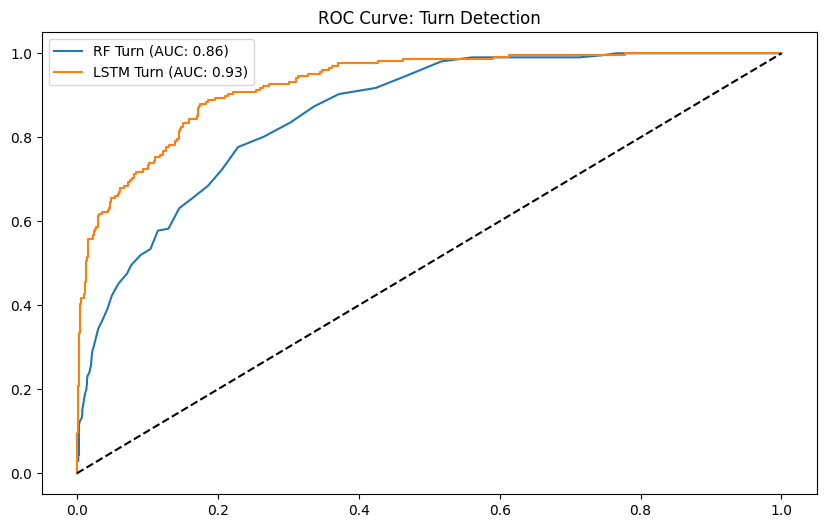

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_robust(name, y_true, y_pred, y_prob):
    print(f"\n--- {name} Evaluation ---")
    
    # ensure all 4 classes are accounted for in report
    print(classification_report(
        y_true, 
        y_pred, 
        labels=[0, 1, 2, 3], 
        target_names=['Normal', 'Turn', 'Walking', 'StartHesitation'],
        zero_division=0
    ))
    
    # macro
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    print(f"Macro Recall (Sensitivity): {recall:.4f}")
    
    # ROC AUC
    try:
        # Check if we have enough classes for AUC
        if len(np.unique(y_true)) > 1:
            roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro', labels=[0,1,2,3])
            print(f"Macro ROC AUC: {roc_auc:.4f}")
        else:
            print("Skipping ROC AUC: Only 1 class present in test set.")
    except Exception as e:
        print(f"Could not calculate ROC AUC: {e}")

evaluate_robust("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate_robust("LSTM", y_test, y_pred_lstm, y_prob_lstm)

# plot ROC for "Turn" (Class 1) if it exists in test set
if 1 in y_test:
    target_class = 1
    plt.figure(figsize=(10, 6))
    
    fpr_rf, tpr_rf, _ = roc_curve((y_test == target_class).astype(int), y_prob_rf[:, target_class])
    plt.plot(fpr_rf, tpr_rf, label=f'RF Turn (AUC: {auc(fpr_rf, tpr_rf):.2f})')
    
    fpr_lstm, tpr_lstm, _ = roc_curve((y_test == target_class).astype(int), y_prob_lstm[:, target_class])
    plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM Turn (AUC: {auc(fpr_lstm, tpr_lstm):.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve: Turn Detection')
    plt.legend()
    plt.show()
else:
    print("Class 'Turn' (1) not found in test set, skipping plot.")